In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 
import scipy 
import os 

In [2]:
def compute_content_cost(a_c,a_g):
    """
    this implement content cost 

    arguments:
    a_c -- activation of content image in our chosen layer l 
    a_g -- activation of generative image in our layer l 

    returns:
    J_content -- content cost calculated
    """
    (m,n_h,n_w,n_c) = a_c.shape
    a_c_2d = tf.reshape(a_c,(m,n_h*n_w,n_c))
    a_g_2d = tf.reshape(a_g,(m,n_h*n_w,n_c))
    J_content = tf.reduce_sum(tf.square(a_c_2d-a_g_2d)) * (.25/float(int((n_h*n_w*n_w))))
    return J_content

In [3]:
tf.compat.v1.reset_default_graph()
with tf.compat.v1.Session() as test:
    tf.compat.v1.set_random_seed(1)
    a_C = tf.random.normal([1, 4, 4, 3], mean=1, stddev=4)
    a_G = tf.random.normal([1, 4, 4, 3], mean=1, stddev=4)
    J_content = compute_content_cost(a_C, a_G)
    print("J_content = " + str(J_content.eval()))


J_content = 5.730767


In [4]:
def gram_matrix(A):
    """
    this create gram matrix of A 

    arguments:
    A -- input tensor as 3d tensor with some chanels , shape = (h*w,c)

    returns:
    G_gram -- Gram matrix of A
    """
    A_reshaped = A
    # (m,h,w,c) = A.shape
    # A_reshaped = tf.reshape(A,(m,-1,c))
    G_gram = tf.matmul(A_reshaped,tf.transpose(A_reshaped))
    return G_gram

In [5]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as test:
    tf.compat.v1.set_random_seed(1)
    A = tf.random.normal([3, 2*1], mean=1, stddev=4)
    GA = gram_matrix(A)
    
    print("GA = \n" + str(GA.eval()))

GA = 
[[ 15.615461  12.248833 -29.87157 ]
 [ 12.248833  10.877857 -19.879116]
 [-29.87157  -19.879116  67.08007 ]]


**Expected Output**:

<table>
    <tr>
        <td>
            **GA**
        </td>
        <td>            
[[ 15.615461  12.248833 -29.87157  <br>]            
 [ 12.248833  10.877857 -19.87911 <br>6            
 [-29.87157  -19.879116  67.08007
        </td>
    </tr>

</table>

In [6]:
def compute_layer_style_cost(a_s , a_g):
    """
    compute style cost for activation of a layer 

    arguments:
    a_s -- activation of the layer for style image , shape = (1,h,w,c)
    a_g -- activation of the layer for generated image , shape = (1,h,w,c)

    returns:
    J_style_layer -- style cost
    """
    (_,h,w,c) = a_s.shape
    a_s_res = tf.transpose(tf.reshape(a_s,(-1,c)))
    a_g_res = tf.transpose(tf.reshape(a_g,(-1,c)))
    G_s = gram_matrix(a_s_res)
    G_g = gram_matrix(a_g_res)
    J_style_layer = (.5/(h*w*c))**2  * tf.reduce_sum(tf.square(G_s-G_g))
    return J_style_layer

In [7]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as test:
    tf.compat.v1.set_random_seed(1)
    a_S = tf.random.normal([1, 4, 4, 3], mean=1, stddev=4)
    a_G = tf.random.normal([1, 4, 4, 3], mean=1, stddev=4)
    J_style_layer = compute_layer_style_cost(a_S, a_G)
    
    print("J_style_layer = " + str(J_style_layer.eval()))

J_style_layer = 2.2849257


In [8]:
STYLE_LAYERS = [
    ('conv1_1', 0.2),
    ('conv2_1', 0.2),
    ('conv3_1', 0.2),
    ('conv4_1', 0.2),
    ('conv5_1', 0.2)]

In [9]:
def compute_style_cost(model,layers):
    """
    this compute style cost over layers and avrage them 
    argumnets:
    model -- our encoder model 
    layers -- python list inclding tuples 
        layer_name -- name of a layer that we want to use 
        alpha -- cofecient of effectiveness of that layer 

    returns:
    J_style 
    """
    J_style = 0 

    for layer_name , alpha in layers:

        out = model[layer_name]
        a_S = sess.run(out)
        a_G = out 
        j_style = compute_layer_style_cost(a_S,a_G)
        J_style += alpha * j_style 

    return J_style 
    

In [10]:
def total_cost(content_cost,style_cost,alpha=10,beta=40):
    """
    this combine our two main cost for transfor learning 
    arguments:
    contetnt_cost -- difrent beween contented image and generated image 
    style_cost -- diffrent between style image and generateed image 
    alpha -- cofffecient of content cost 
    beta -- cofesient of style_cost 

    returns:
    total_cost -- combination between atguments 
    """
    total_cost = alpha*content_cost + beta*style_cost 
    return total_cost 

In [11]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as test:
    np.random.seed(3)
    J_content = np.random.randn()    
    J_style = np.random.randn()
    J = total_cost(J_content, J_style)
    print("J = " + str(J))

J = 35.34667875478276


**Expected Output**:

<table>
    <tr>
        <td>
            **J**
        </td>
        <td>
           35.34667875478276
        </td>
    </tr>

</table>

In [12]:
from nst_utils import *
import imageio.v2 as img

In [13]:
content_image = img.imread("images/louvre_small.jpg")
content_image = reshape_and_normalize_image(content_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


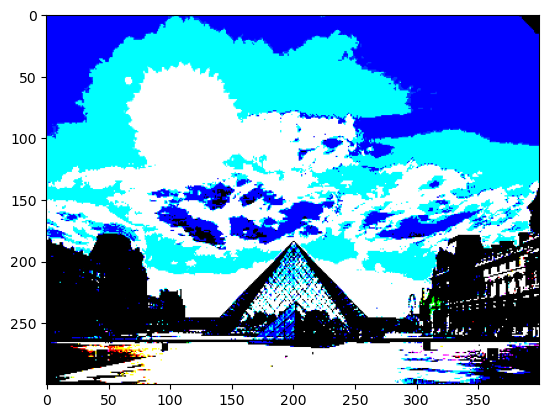

In [14]:
plt.imshow(content_image[0])

In [15]:
style_image = img.imread("images/monet.jpg")
style_image = reshape_and_normalize_image(style_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


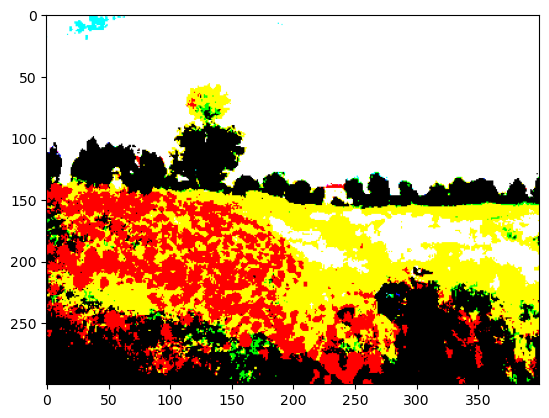

In [16]:
plt.imshow(style_image[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


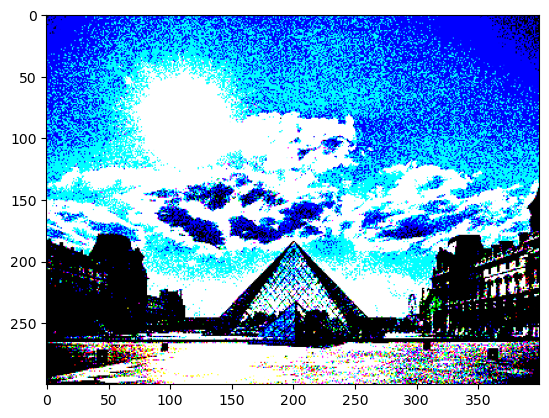

In [17]:
generated_image = generate_noise_image(content_image)
plt.imshow(generated_image[0])

In [18]:
tf.compat.v1.reset_default_graph()
with tf.compat.v1.Session() as sess:
    content_image = img.imread("images/louvre_small.jpg")
    content_image = reshape_and_normalize_image(content_image)
    style_image = img.imread("images/monet.jpg")
    style_image = reshape_and_normalize_image(style_image)
    generated_image = generate_noise_image(content_image)
    model = load_vgg_model("pretrained-model/imagenet-vgg-verydeep-19.mat")
    sess.run(model['input'].assign(content_image))
    out = model['conv4_2']
    a_C = sess.run(out)
    a_G = out
    J_content = compute_content_cost(a_C, a_G)
    sess.run(model['input'].assign(style_image))
    J_style = compute_style_cost(model, STYLE_LAYERS)
    J = total_cost(J_content, J_style, alpha = 10, beta = 40)
    optimizer = tf.compat.v1.train.AdamOptimizer(2.0)
    train_step = optimizer.minimize(J)
    def model_nn(sess, input_image, num_iterations = 200):
        sess.run(tf.compat.v1.global_variables_initializer())
        sess.run(model['input'].assign(input_image))
        for i in range(num_iterations):
            somthing = sess.run(train_step)
            generated_image = sess.run(model['input'])
            if i%20 == 0:
                Jt, Jc, Js = sess.run([J, J_content, J_style])
                print("Iteration " + str(i) + " :")
                print("total cost = " + str(Jt))
                print("content cost = " + str(Jc))
                print("style cost = " + str(Js))
                save_image("output/" + str(i) + ".png", generated_image)
        save_image('output/generated_image.jpg', generated_image)
        
        return generated_image

    model_nn(sess, generated_image)


Iteration 0 :
total cost = 5048279600.0
content cost = 80537.125
style cost = 126186856.0
Iteration 20 :
total cost = 945604200.0
content cost = 155878.72
style cost = 23601136.0
Iteration 40 :
total cost = 481476860.0
content cost = 170974.45
style cost = 11994178.0
Iteration 60 :
total cost = 311670750.0
content cost = 178431.58
style cost = 7747160.5
Iteration 80 :
total cost = 227777300.0
content cost = 182441.16
style cost = 5648822.0
Iteration 100 :
total cost = 180283940.0
content cost = 185290.95
style cost = 4460775.5
Iteration 120 :
total cost = 149291140.0
content cost = 187640.7
style cost = 3685368.5
Iteration 140 :
total cost = 127477300.0
content cost = 189491.53
style cost = 3139559.5
Iteration 160 :
total cost = 111114930.0
content cost = 191025.25
style cost = 2730116.8
Iteration 180 :
total cost = 98224350.0
content cost = 192210.73
style cost = 2407556.2


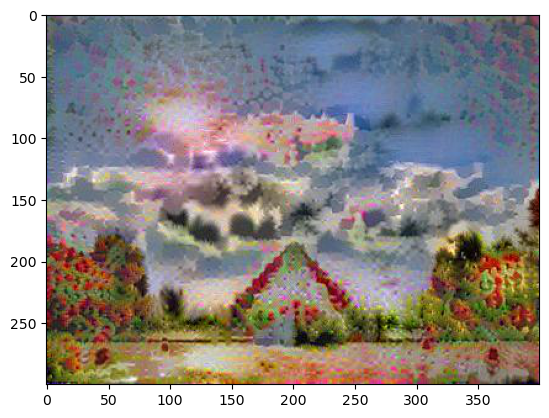

In [24]:
plt.imshow(img.imread("output\generated_image.jpg"))